       Formatas  Įrašymo greitis (%)  Skaitymo greitis (%)  Failo dydis (%)
0           CSV                 20.0             21.428571        20.000000
1       Parquet                 40.0             35.714286       100.000000
2  Excel (XLSX)                  2.0              2.142857        13.333333
3          JSON                 10.0              8.571429        16.666667
4          HDF5                 60.0             71.428571        40.000000
5       Feather                100.0            100.000000        80.000000
6           SQL                 10.0             14.285714        25.000000


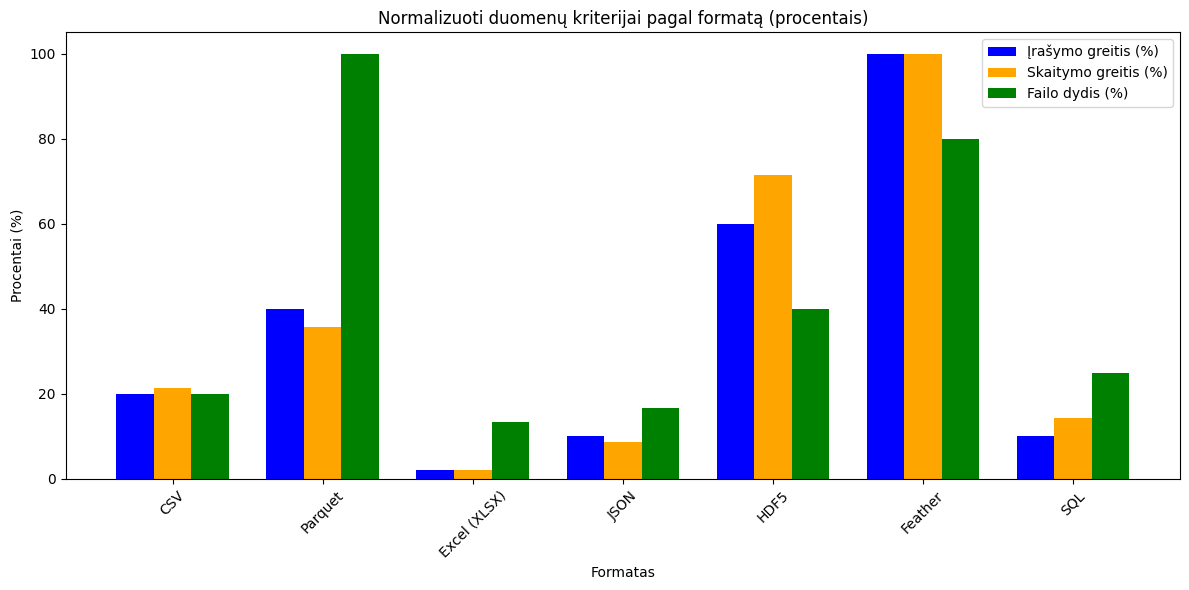

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sukuriame duomenų lentelę
data = {
    "Formatas": ["CSV", "Parquet", "Excel (XLSX)", "JSON", "HDF5", "Feather", "SQL"],
    "Įrašymo greitis (eil./s)": [100000, 200000, 10000, 50000, 300000, 500000, 50000],
    "Skaitymo greitis (eil./s)": [150000, 250000, 15000, 60000, 500000, 700000, 100000],
    "Failo dydis (MB)": [100, 20, 150, 120, 50, 25, 80],  # SQL dydis apskaičiuotas (~80 MB)
}

# Sukuriame Pandas DataFrame
df = pd.DataFrame(data)

# Konvertuojame failo dydį į atvirkštinį (gerumo skalė: didesnė reikšmė = geriau)
df["Failo dydis (gerumas)"] = 1 / df["Failo dydis (MB)"]

# Normalizuojame kiekvieną kriterijų į procentus
df["Įrašymo greitis (%)"] = df["Įrašymo greitis (eil./s)"] / df["Įrašymo greitis (eil./s)"].max() * 100
df["Skaitymo greitis (%)"] = df["Skaitymo greitis (eil./s)"] / df["Skaitymo greitis (eil./s)"].max() * 100
df["Failo dydis (%)"] = df["Failo dydis (gerumas)"] / df["Failo dydis (gerumas)"].max() * 100

# Atspausdiname normalizuotus rezultatus
print(df[["Formatas", "Įrašymo greitis (%)", "Skaitymo greitis (%)", "Failo dydis (%)"]])

# Sukuriame stulpelinę diagramą
x = np.arange(len(df["Formatas"]))  # Formatų indeksai
width = 0.25  # Stulpelio plotis

plt.figure(figsize=(12, 6))
plt.bar(x - width, df["Įrašymo greitis (%)"], width, label="Įrašymo greitis (%)", color="blue")
plt.bar(x, df["Skaitymo greitis (%)"], width, label="Skaitymo greitis (%)", color="orange")
plt.bar(x + width, df["Failo dydis (%)"], width, label="Failo dydis (%)", color="green")

# Diagramos parametrai
plt.title("Normalizuoti duomenų kriterijai pagal formatą (procentais)")
plt.xlabel("Formatas")
plt.ylabel("Procentai (%)")
plt.xticks(x, df["Formatas"], rotation=45)
plt.legend()
plt.tight_layout()

# Išsaugome ir parodome diagramą
plt.savefig("normalizuoti_formatu_duomenys.png")
plt.show()
